In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.units as units
import matplotlib.ticker as ticker
import random
import time                   # To time processes
import warnings               # To suppress warnings
import itertools
import datetime
import tensorflow as tf
import csv
import math

from random import shuffle
from pandas import read_csv
from sklearn import metrics
from sklearn import svm
from matplotlib import pyplot
from numpy import array
from numpy import argmax
from scipy import stats


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_curve

from sklearn.utils import class_weight
from sklearn.utils.fixes import signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.base import TransformerMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import Callback

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from matplotlib.pyplot import *

warnings.filterwarnings("ignore")

In [2]:
dataset3 = read_csv("Week 3.csv", encoding="ISO-8859-1")
df_week3=dataset3[['viewed','explored','certified','grade','nevents','ndays_act','nchapters','LoE_DI','Last event date','Completed_or_not']]

In [3]:
# Add testing and result dataset for week 2
df2=read_csv("Week 3 Test data.csv")
df3=read_csv("Week 3 Test result.csv")

In [4]:
df3.head()

,Unnamed: 0,Completed_or_not
0,32552,0
1,4399,0
2,31280,0
3,5132,0
4,14925,0


In [6]:
X3=df_week3.iloc[:,[0,1,2,3,4,5,6,7,8]]
y3=df_week3.iloc[:,[9]]

Z3=df2.iloc[:,[1,2,9,3,4,5,6,7,8]]
yy=df3.iloc[:,[1]]

In [7]:
yy['Completed_or_not'].value_counts()

0    11466
1      389
Name: Completed_or_not, dtype: int64

In [8]:
y3['Completed_or_not'].value_counts()

0.0    81267
1.0     3097
Name: Completed_or_not, dtype: int64

In [9]:
#Performing Z-Score Normalization

X3=stats.zscore(X3)
Z3=stats.zscore(Z3)

In [10]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X3, y3)

In [11]:
unique, counts = np.unique(y_tl, return_counts=True)

print (np.asarray((unique, counts)).T)

[[0.0000e+00 8.1228e+04]
 [1.0000e+00 3.0970e+03]]


In [12]:
all_classes=['Not Completed','Completed']

In [13]:
model = Sequential()
#Adding dropout between the input layer and the first hidden layer
model.add(Dense(12, input_dim=9, activation='softmax'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.add(Dense(6, activation='softmax'))
model.add(Dense(4, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dropout(0.2))

In [14]:
#We will use logarithmic loss, which for a binary classification problem is defined as “binary_crossentropy“.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Fit the model
history=model.fit(X_tl, y_tl, epochs=150, batch_size=35, class_weight='auto')

Epoch 1/150
84325/84325 [==============================] - 3s 39us/step - loss: 0.2479 - acc: 0.9539
Epoch 2/150
84325/84325 [==============================] - 3s 36us/step - loss: 0.0544 - acc: 0.9816
Epoch 3/150
84325/84325 [==============================] - 3s 34us/step - loss: 0.0211 - acc: 0.9981
Epoch 4/150
84325/84325 [==============================] - 4s 42us/step - loss: 0.0107 - acc: 0.9986
Epoch 5/150
84325/84325 [==============================] - 3s 41us/step - loss: 0.0057 - acc: 0.9991
Epoch 6/150
84325/84325 [==============================] - 3s 36us/step - loss: 0.0038 - acc: 0.9991
Epoch 7/150
84325/84325 [==============================] - 3s 35us/step - loss: 0.0032 - acc: 0.9991
Epoch 8/150
84325/84325 [==============================] - 3s 35us/step - loss: 0.0026 - acc: 0.9993
Epoch 9/150
84325/84325 [==============================] - 3s 36us/step - loss: 0.0026 - acc: 0.9993
Epoch 10/150
84325/84325 [==============================] - 3s 37us/step - loss: 0.0023 - a

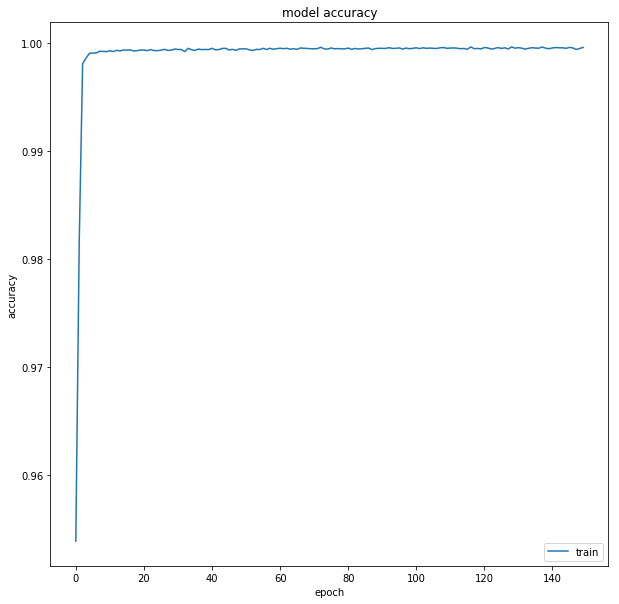

In [16]:
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

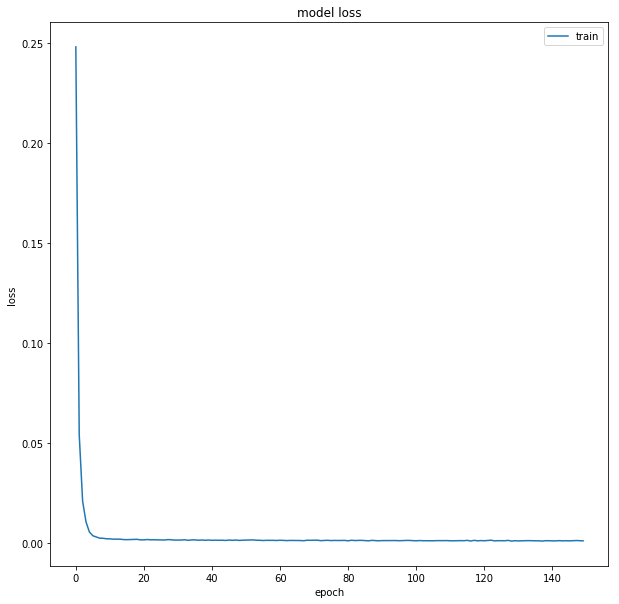

In [17]:
# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [18]:
# show the inputs and predicted outputs
#predictions for test dataset
predictions = model.predict_classes(Z3)
#for i in range(len(Z)):
 #   print("X=%s, Predicted=%s" % (Z[i].astype(int), predictions[i]))

In [19]:
unique, counts = np.unique(predictions, return_counts=True)

print (np.asarray((unique, counts)).T)

[[    0 11440]
 [    1   415]]


In [36]:
ls=[]
ls.append(predicted)
dfpred = pd.DataFrame({'Dropout count':ls})

dfpred1=read_csv("Dropout values.csv")

dfpred1=pd.concat([dfpred1,dfpred])

dfpred1=dfpred1.drop(columns='Unnamed: 0')

dfpred1.to_csv("Dropout values.csv")

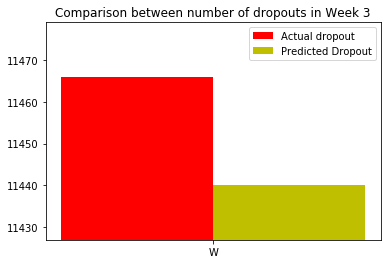

In [33]:
# Create bar chart comparison for expected vs actual incompletion in week 3
actual=11466
predicted=(predictions.shape[0]-np.count_nonzero(predictions))

fig, ax = plt.subplots()
low = min(actual,predicted)
high = max(actual,predicted)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

ind = np.arange(1)    # the x locations for the groups
width = 0.15         # the width of the bars
p1 = ax.bar(ind, actual, width, color='r')
p2 = ax.bar(ind + width, predicted, width,color='y')

ax.set_title('Comparison between number of dropouts in Week 3')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Week 2'))

ax.legend((p1[0], p2[0]), ('Actual dropout', 'Predicted Dropout'))
ax.autoscale_view()

plt.show()


In [21]:
probability = (model.predict_proba(Z3))
#for i in range(len(Z)):
 #   print("X=%s, Predicted=%s" % (Z[i].astype(int), probability[i]))

In [22]:
# Evaluate the model
scores = model.evaluate(Z3, yy)
#print(history.history.keys())
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

11855/11855 [==============================] - 0s 19us/step

loss: 9.57%

acc: 98.80%


In [23]:
print("Number of mislabeled points out of a total %d points : %d \n\n" % (Z3.shape[0],(yy != predictions).sum()))

Number of mislabeled points out of a total 11855 points : 142 




In [24]:
#pre_cls=model.predict_classes(X)    

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
print(classification_report(yy,predictions))
print("Recall score: ", recall_score(yy,predictions))
print("Precision score: ", precision_score(yy,predictions,average='weighted'))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11466
           1       0.80      0.85      0.82       389

   micro avg       0.99      0.99      0.99     11855
   macro avg       0.90      0.92      0.91     11855
weighted avg       0.99      0.99      0.99     11855

Recall score:  0.8508997429305912
Precision score:  0.9884547306976458


Confusion matrix, without normalization
[[11382    84]
 [   58   331]]


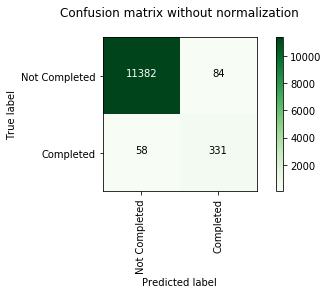

In [26]:
cnf_matrix=confusion_matrix(yy,predictions)

plot_confusion_matrix(cnf_matrix, classes=all_classes, title='Confusion matrix without normalization\n')

In [27]:
dftemp1=read_csv("Probability values.csv")

In [28]:
dftemp2 = pd.DataFrame({'Probability Week 3':probability[:,0]})

In [29]:
dftemp1=pd.concat([dftemp1,dftemp2],axis=1)

In [30]:
dftemp1.to_csv("Probability values.csv")

In [34]:
dftemp2.to_csv("Prob week3.csv")